In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from itertools import permutations, product, combinations
from scipy.stats import pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler

# Settings

In [2]:
#analysis = "Fastcore"
#analysis = "gimme"
#analysis = "iMAT"
#analysis = "init"
analysis = "tinit"

## Read the data

In [3]:
if analysis == "Fastcore":
    df = pd.read_csv("data\\"+analysis+"_rxnMatrix.csv", sep=",")
    df = df.drop(columns='Unnamed: 0')
else:
    df = pd.read_csv("data\\"+analysis+"_rxnMatrix.csv", sep=";")

In [4]:
M = np.transpose(df.values[:,1:])
models = list(df.columns[1:])
models = list(map(lambda x: x.split("_")[1].split(".")[0], models))

### Grouping by genotype

In [5]:
# WT
genotype0 = ["GSM1405493","GSM1405505","GSM1405517", 
              "GSM1405489","GSM1405501","GSM1405513",
              "GSM1405485","GSM1405497","GSM1405509",
              "GSM1405494","GSM1405506","GSM1405518",
              "GSM1405490","GSM1405502","GSM1405514",
              "GSM1405486","GSM1405498","GSM1405510"]
# KO
genotype1 = ["GSM1405495","GSM1405507","GSM1405519",
              "GSM1405491","GSM1405503","GSM1405515",
              "GSM1405487","GSM1405499","GSM1405511",
              "GSM1405496","GSM1405508","GSM1405520",
              "GSM1405492","GSM1405504","GSM1405516",
              "GSM1405488","GSM1405500","GSM1405512"]
genotype = (genotype0, genotype1)

### Grouping by diet

In [6]:
# LFnC
diet0 = ["GSM1405485","GSM1405497","GSM1405509","GSM1405487","GSM1405499","GSM1405511",
         "GSM1405486","GSM1405498","GSM1405510","GSM1405488","GSM1405500","GSM1405512"]

# HFnC
diet1 = ["GSM1405489","GSM1405501","GSM1405513","GSM1405491","GSM1405503","GSM1405515",
         "GSM1405490","GSM1405502","GSM1405514","GSM1405492","GSM1405504","GSM1405516"]

# HFC
diet2 = ["GSM1405493","GSM1405505","GSM1405517","GSM1405495","GSM1405507","GSM1405519",
         "GSM1405494","GSM1405506","GSM1405518","GSM1405496","GSM1405508","GSM1405520"]

diet = (diet0, diet1, diet2)

### Grouping by gender

In [7]:
# F
gender0 = ["GSM1405493","GSM1405505","GSM1405517",
           "GSM1405489","GSM1405501","GSM1405513",
           "GSM1405485","GSM1405497","GSM1405509",
           "GSM1405495","GSM1405507","GSM1405519",
           "GSM1405491","GSM1405503","GSM1405515",
           "GSM1405487","GSM1405499","GSM1405511"]

# M
gender1 = ["GSM1405494","GSM1405506","GSM1405518",
           "GSM1405490","GSM1405502","GSM1405514",
           "GSM1405486","GSM1405498","GSM1405510",
           "GSM1405496","GSM1405508","GSM1405520",
           "GSM1405492","GSM1405504","GSM1405516",
           "GSM1405488","GSM1405500","GSM1405512"]

gender = (gender0, gender1)

In [8]:
groups = {"genotype": genotype, "diet": diet, "gender": gender}
labels = {"genotype": ("WT","KO"), "diet": ("LFnC", "HFnC", "HFC"), "gender": ("F","M")}

## Generate data

In [9]:
"""
models = ["M1", "M2", "M3", "M4", "M5", "M6"]

groups = {
    "gender": (["M1", "M2", "M3"], ["M4", "M5", "M6"]),#, "M7", "M8"]),
    "phenotype": (["M1", "M4"], ["M2", "M5"], ["M3", "M6"]),
    "diet": (["M1", "M5"], ["M2", "M6"], ["M3", "M4"])}
"""

"""
# number of fictional reactions
n_R = 100
"""

#M = np.random.randint(2, size=(len(models), n_R))

"""
# Let's say that reactions are dependent only on gender
M[np.isin(models, groups['gender'][0]),:n_R//2] = 1
M[np.isin(models, groups['gender'][0]),n_R//2:] = 0

M[np.isin(models, groups['gender'][1]),:n_R//2] = 0
M[np.isin(models, groups['gender'][1]),n_R//2:] = 1
"""

#M[np.isin(models, groups['phenotype'][0]),:] = 1
#M[np.isin(models, groups['phenotype'][1]),:] = 0


"\n# Let's say that reactions are dependent only on gender\nM[np.isin(models, groups['gender'][0]),:n_R//2] = 1\nM[np.isin(models, groups['gender'][0]),n_R//2:] = 0\n\nM[np.isin(models, groups['gender'][1]),:n_R//2] = 0\nM[np.isin(models, groups['gender'][1]),n_R//2:] = 1\n"

## Preprocessing

Remove the reactions that are always 0 or always 1

In [10]:
M = M[:,~np.all(M==0, axis=0)]
M = M[:,~np.all(M==1, axis=0)]

In [11]:
M = np.array(M, dtype=float)

Zero centering the rows

In [12]:
M = StandardScaler(with_mean=True, with_std=False).fit_transform(M) #centering only

## PCA

In [13]:
pca = PCA(n_components=3)
comps = pca.fit_transform(M)
df = pd.DataFrame(data = comps, columns = ['PC1', 'PC2', 'PC3'])
df['model'] = models
#df = df.set_index('model')

In [14]:
df_pca = pd.DataFrame()
df_pca = df_pca.append(pd.DataFrame(pca.explained_variance_).T)
df_pca = df_pca.append(pd.DataFrame(pca.explained_variance_ratio_).T)
df_pca.columns = ['PC1', 'PC2', 'PC3']
df_pca['label'] = ['explained variance', 'explained variance ratio']
df_pca = df_pca.set_index('label')
df_pca.to_csv("results_PCA\\"+analysis+"_explained_variance.csv")

In [15]:
pca_explained = pca.explained_variance_ratio_

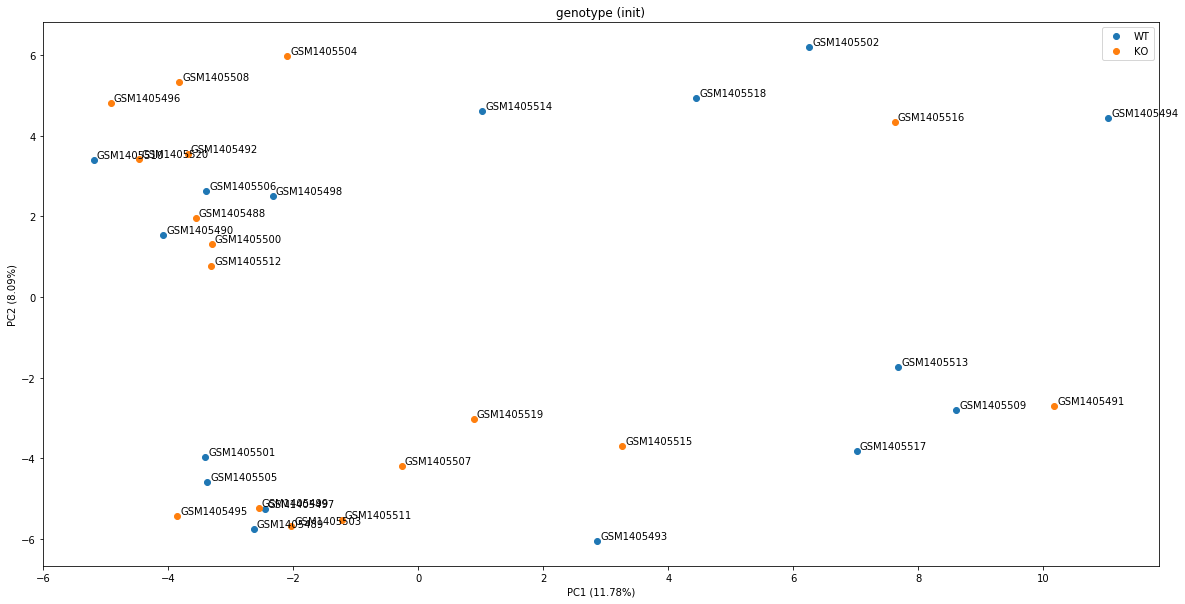

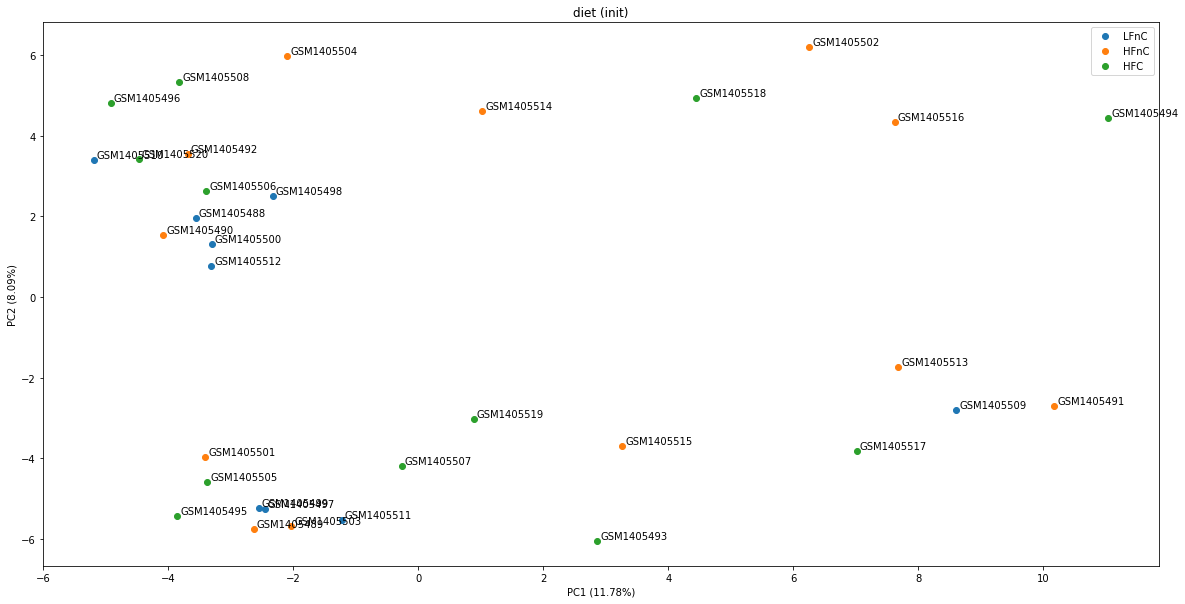

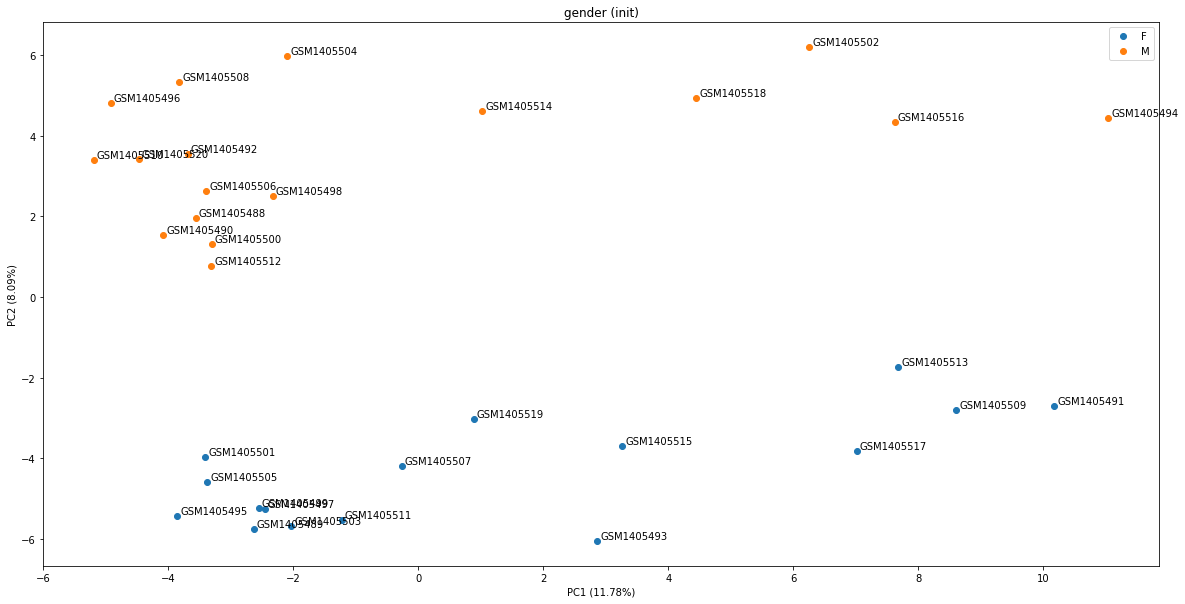

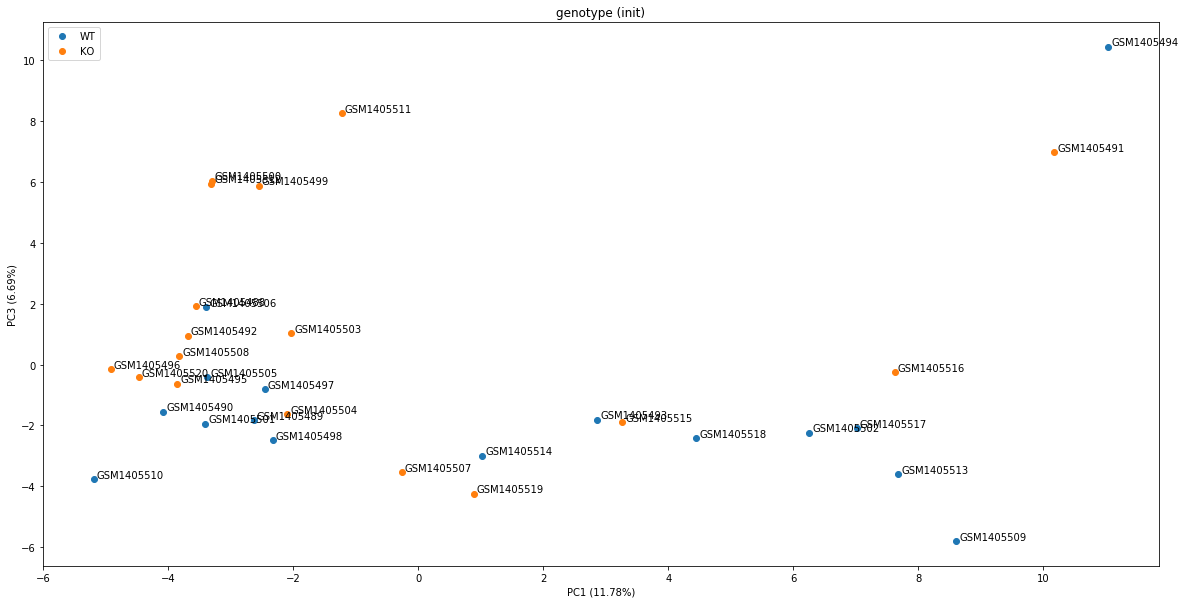

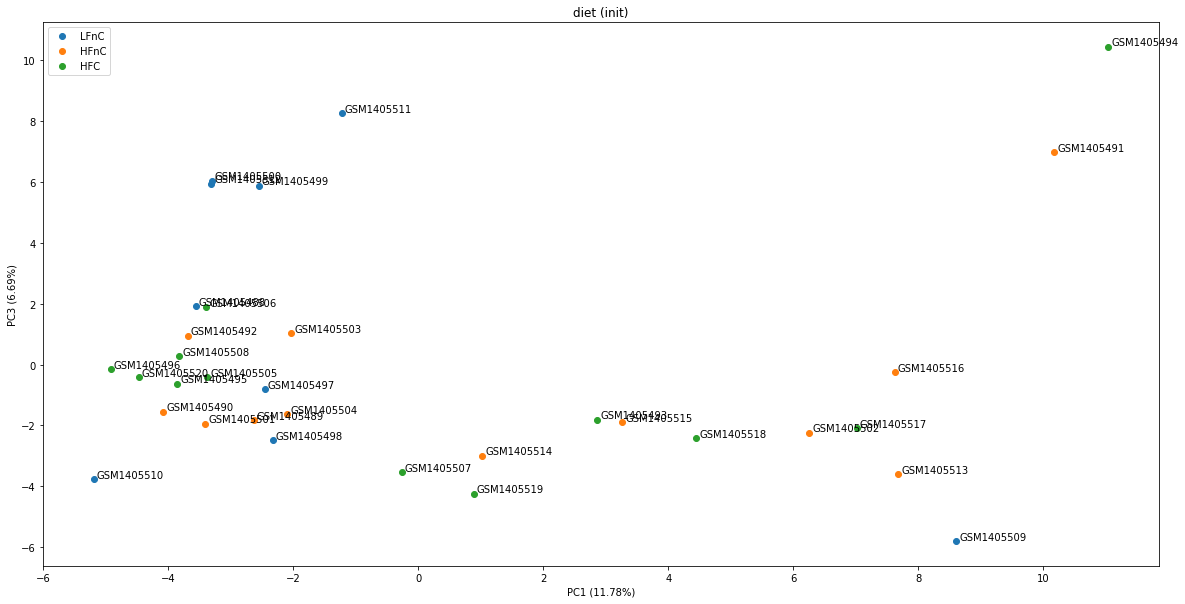

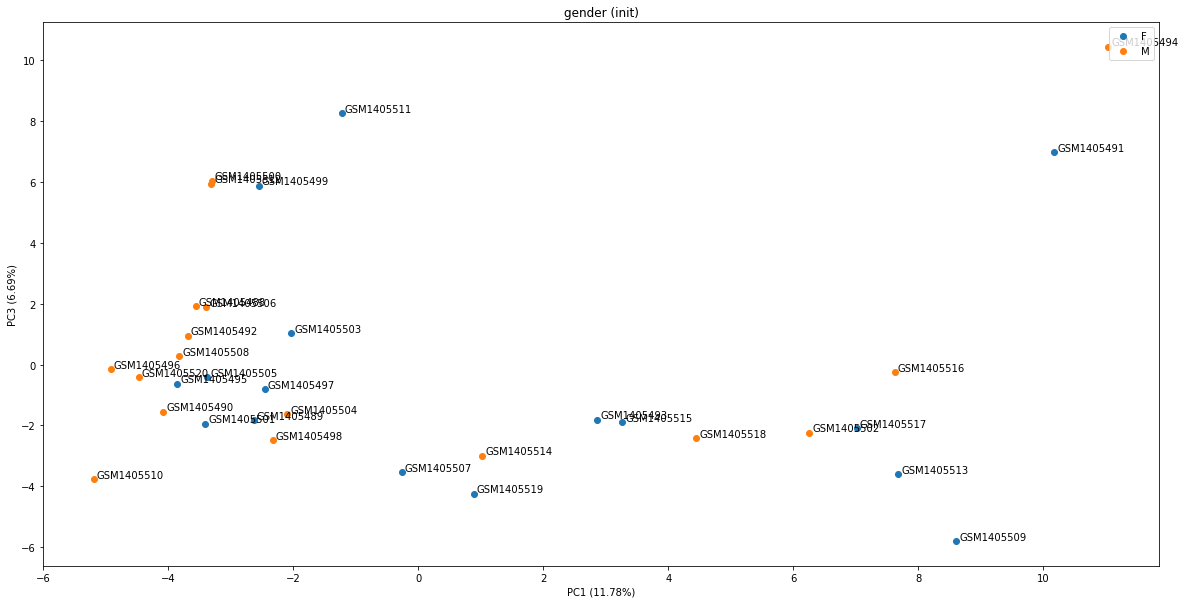

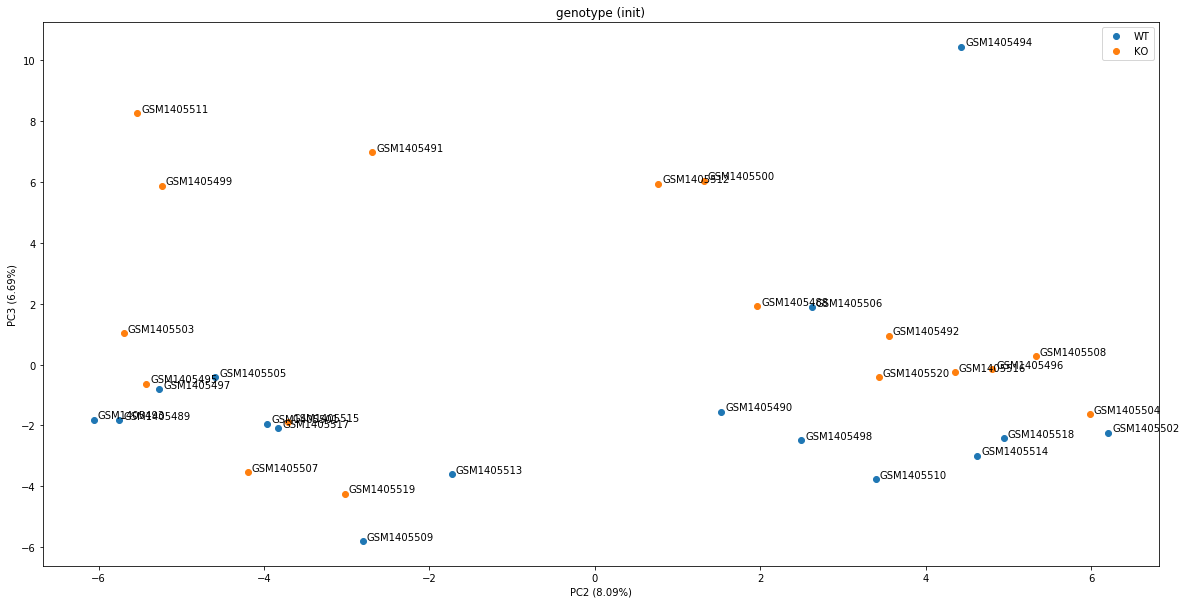

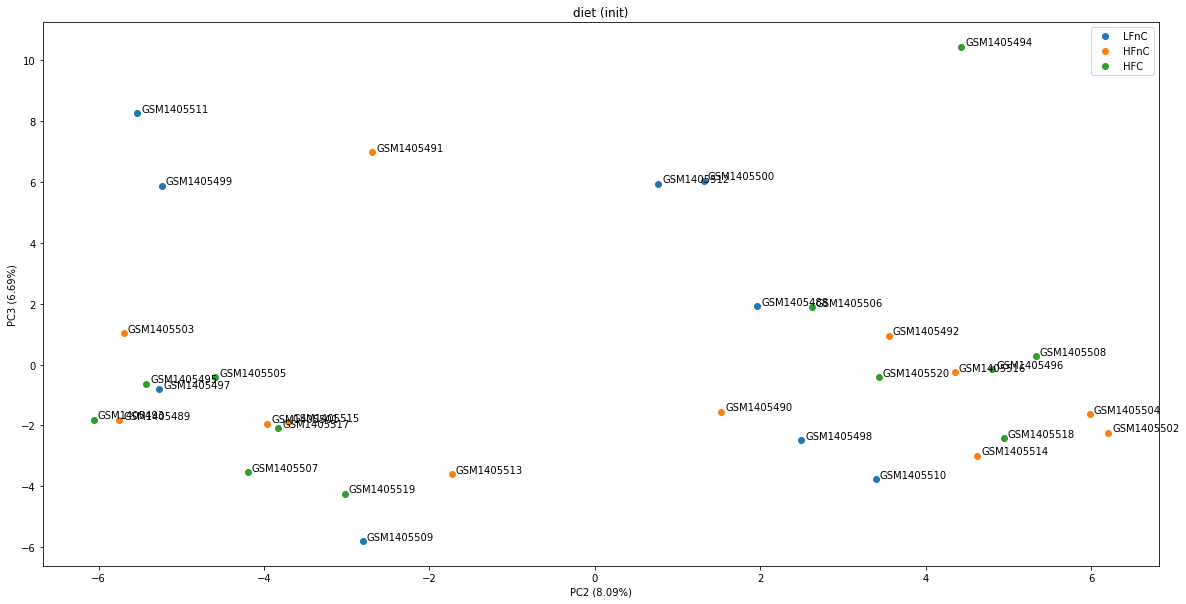

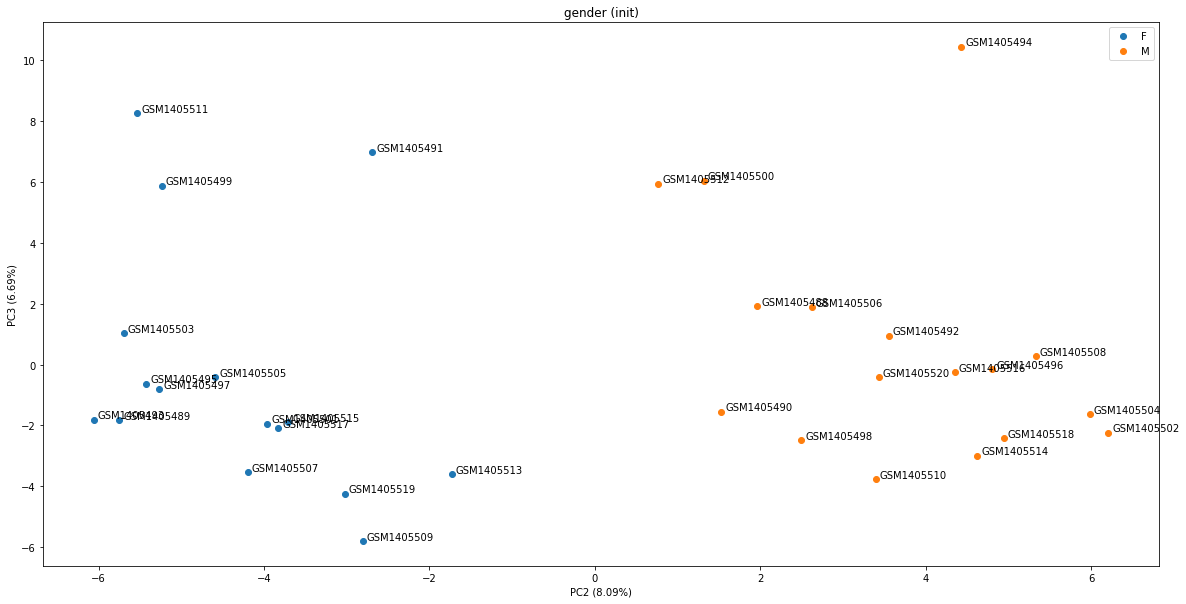

In [16]:
for c in combinations(range(3), 2):
    i1 = c[0]
    i2 = c[1]
    for group in groups:        
        for subgroup, label in zip(groups[group], labels[group]):
            locs = np.isin(models, subgroup)
            plt.plot(comps[locs,i1], comps[locs,i2],"o", label=label)

        for model, x, y in zip(models, comps[:,i1], comps[:,i2]):
            #plt.text(x,y,model[6:])
            for subgroup in groups[group]:
                if model in subgroup:            
                    plt.text(x+0.05,y+0.05,model)

        plt.title(group + " (" + analysis+")")
        plt.xlabel("PC"+str(i1+1) + " (" + str(round(100*pca_explained[i1],2))+"%)")
        plt.ylabel("PC"+str(i2+1) + " (" + str(round(100*pca_explained[i2],2))+"%)")
        plt.legend()
        plt.gcf().set_size_inches(20,10)
        plt.savefig("figures_PCA\\"+analysis+"_PC"+str(i1+1)+'_'+"PC"+str(i2+1)+'_'+group+".pdf", format="pdf", bbox_inches = 'tight')
        plt.savefig("figures_PCA\\"+analysis+"_PC"+str(i1+1)+'_'+"PC"+str(i2+1)+'_'+group+".png", format="png", bbox_inches = 'tight')
        plt.show()

In [17]:
groups

{'genotype': (['GSM1405493',
   'GSM1405505',
   'GSM1405517',
   'GSM1405489',
   'GSM1405501',
   'GSM1405513',
   'GSM1405485',
   'GSM1405497',
   'GSM1405509',
   'GSM1405494',
   'GSM1405506',
   'GSM1405518',
   'GSM1405490',
   'GSM1405502',
   'GSM1405514',
   'GSM1405486',
   'GSM1405498',
   'GSM1405510'],
  ['GSM1405495',
   'GSM1405507',
   'GSM1405519',
   'GSM1405491',
   'GSM1405503',
   'GSM1405515',
   'GSM1405487',
   'GSM1405499',
   'GSM1405511',
   'GSM1405496',
   'GSM1405508',
   'GSM1405520',
   'GSM1405492',
   'GSM1405504',
   'GSM1405516',
   'GSM1405488',
   'GSM1405500',
   'GSM1405512']),
 'diet': (['GSM1405485',
   'GSM1405497',
   'GSM1405509',
   'GSM1405487',
   'GSM1405499',
   'GSM1405511',
   'GSM1405486',
   'GSM1405498',
   'GSM1405510',
   'GSM1405488',
   'GSM1405500',
   'GSM1405512'],
  ['GSM1405489',
   'GSM1405501',
   'GSM1405513',
   'GSM1405491',
   'GSM1405503',
   'GSM1405515',
   'GSM1405490',
   'GSM1405502',
   'GSM1405514',
   'GSM

# Sort and correlate (faster)

In [18]:
factors = list(groups.keys())
Rs = np.zeros((len(factors), 3))
rhos = np.zeros((len(factors), 3))


for ii, factor in enumerate(groups):
    scores1 = []
    scores2 = []
    scores3 = []
    for i in range(len(groups[factor])):
        idxs = np.array(np.where(np.isin(models, groups[factor][i])==True)).flatten()
        scores1.append(sorted(df.iloc[idxs, 0].values))
        scores2.append(sorted(df.iloc[idxs, 1].values))
        scores3.append(sorted(df.iloc[idxs, 2].values))
        
    for idx in permutations(range(len(scores1))):
        s1 = []
        s2 = []
        s3 = []        
        for i in idx:
            s1 += scores1[i]
            s2 += scores2[i]
            s3 += scores3[i]
            
        
        R_PC1 = pearsonr(np.arange(len(s1)), s1)[0]
        R_PC2 = pearsonr(np.arange(len(s2)), s2)[0]
        R_PC3 = pearsonr(np.arange(len(s3)), s3)[0]

        rho_PC1 = spearmanr(np.arange(len(s1)), s1)[0]
        rho_PC2 = spearmanr(np.arange(len(s2)), s2)[0]
        rho_PC3 = spearmanr(np.arange(len(s3)), s3)[0]

        Rs[ii, 0] = max(Rs[ii, 0], abs(R_PC1))
        Rs[ii, 1] = max(Rs[ii, 1], abs(R_PC2))
        Rs[ii, 2] = max(Rs[ii, 2], abs(R_PC3))

        rhos[ii, 0] = max(rhos[ii, 0], abs(rho_PC1))
        rhos[ii, 1] = max(rhos[ii, 1], abs(rho_PC2))
        rhos[ii, 2] = max(rhos[ii, 2], abs(rho_PC3))

        
        
    

## Postprocessing

### Pearson

In [19]:
Rs2 = Rs ** 2 # coefficient of determination
#Rs = Rs / np.sum(Rs, axis=0) # conversion to percentages
#Rs2 = Rs2 / np.sum(Rs2, axis=0) # conversion to percentages

In [20]:
#df_R = pd.DataFrame(data = Rs, columns = ['R(PC1)', 'R(PC2)', 'R(PC3)'])
#df_R['factor'] = groups.keys()

#df_R2 = pd.DataFrame(data = np.column_stack((Rs2,abs_Rs2)), columns = ['R2(PC1) [%]', 'R2(PC2) [%]', 'R2(PC3) [%]','R2(PC1)', 'R2(PC2)', 'R2(PC3)'])
df_R2 = pd.DataFrame(data = Rs2, columns = ['R2(PC1)', 'R2(PC2)', 'R2(PC3)'])
df_R2['factor'] = groups.keys()

#df_R = pd.merge(df_R, df_R2)
df_R2=df_R2.set_index('factor')



In [21]:
df_R2.to_csv("results_PCA\\"+analysis+"_pearson_variability_explained.csv")

### Spearman

In [22]:
rhos2 = rhos ** 2 # coefficient of determination
#rhos = rhos / np.sum(rhos, axis=0) # conversion to percentages
#rhos2 = abs_rhos2 / np.sum(abs_rhos2, axis=0) # conversion to percentages

In [23]:
#df_rho = pd.DataFrame(data = rhos, columns = ['Rho(PC1)', 'Rho(PC2)', 'Rho(PC3)'])
#df_rho['factor'] = groups.keys()

#df_rho2 = pd.DataFrame(data = np.column_stack((rhos2,abs_rhos2)), columns = ['Rho2(PC1) [%]', 'Rho2(PC2) [%]', 'Rho2(PC3) [%]','Rho2(PC1)', 'Rho2(PC2)', 'Rho2(PC3)'])
df_rho2 = pd.DataFrame(data = rhos2, columns = ['Rho2(PC1)', 'Rho2(PC2)', 'Rho2(PC3)'])
df_rho2['factor'] = groups.keys()

#df_rho = pd.merge(df_rho, df_rho2)
df_rho2=df_rho2.set_index('factor')

In [24]:
df_rho2

,Rho2(PC1),Rho2(PC2),Rho2(PC3)
factor,,,
genotype,0.435282,0.253690,0.684270
diet,0.276046,0.229067,0.206612
gender,0.550036,1.000000,0.415663


In [25]:
df_rho2.to_csv("results_PCA\\"+analysis+"_spearman_variability_explained.csv")